In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fast slow PZT graphs

In [2]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

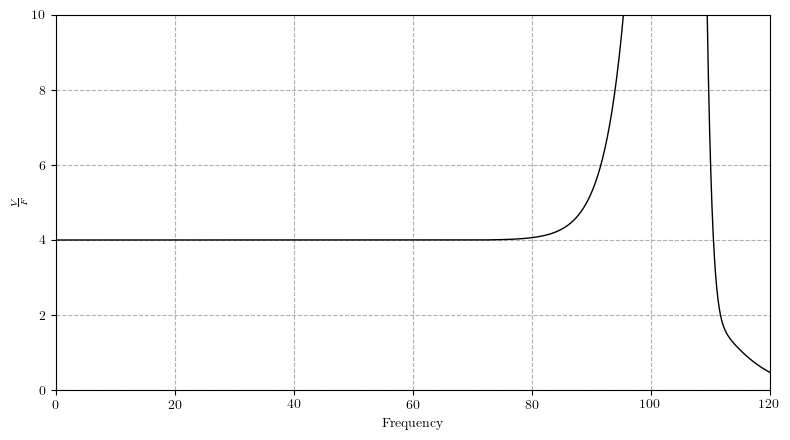

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Frequency range
f = np.linspace(0, 200, 1000)

# Flat sensitivity from 0 to 90
response = np.ones_like(f) * 4

# Exponential increase from 90 to resonance point at 105
resonance_freq = 105
exp_start = 70
exp_end = resonance_freq
resonance_peak = 100
flat_value = 4

# Find indices for exponential region
exp_region = (f > exp_start) & (f <= exp_end)
# Scale exponential so it starts at 4 and ends at resonance_peak
exp_scale = (resonance_peak - flat_value)
exp_x = (f[exp_region] - exp_start) / (exp_end - exp_start)
response[exp_region] = flat_value + exp_scale * (np.exp(exp_x * scale) - 1) / (np.exp(scale) - 1)

# Resonance at 105 (already defined)
resonance = resonance_peak * np.exp(-0.5 * ((f - resonance_freq) / resonance_width) ** 2)
response += resonance

# After resonance, drop off as before
drop_start = 110
drop_depth = 4
drop_width = 10
drop = -drop_depth * (1 / (1 + np.exp(-(f - drop_start) / (drop_width / 2))))
response += drop

# Keep response flat at 4 for f <= 90
response[f <= exp_start] = flat_value

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4.5))

# Plot the frequency response
ax.plot(f, response, color='black')

# Labels
ax.set_xlabel('Frequency')
ax.set_ylabel(r'$\frac{V}{F}$')

# Adjust limits
ax.set_xlim(0, 120)
ax.set_ylim(0, 10)

plt.tight_layout()
plt.show()


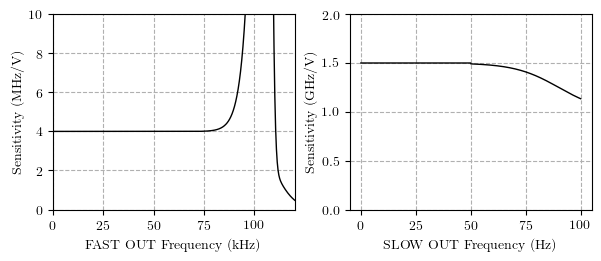

In [67]:
# fast PZT frequency response graph

# first section: flat sensitivity
# second section: sensitivity with resonance

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

fast_freq = np.linspace(0,200,1000) #kHz
fast_flat_sensitivity = 4 * np.ones_like(fast_freq[:500]) #MHz/V
fast_resonance_sensitivity = 4 * np.exp(0.01 * (fast_freq[500:] - 100)) #MHz/V
fast_full_sensitivity = np.concatenate((fast_flat_sensitivity, fast_resonance_sensitivity))
# ax1.plot(fast_freq[:900], fast_full_sensitivity[:900], label="Resonance", color="black")
ax1.set_ylim(0, 10)

ax1.set_xlabel("FAST OUT Frequency (kHz)")
ax1.set_ylabel("Sensitivity (MHz/V)")

ax1.plot(f, response, color='black')
ax1.set_xlim(0,120)

slow_freq = np.linspace(0,100,1000) #Hz
slow_flat_sensitivity = 1.5 * np.ones_like(slow_freq[:500]) #GHz/V
# slow resonance sensitivty now rolls off
slow_resonance_sensitivity = 1.5 * np.exp(-0.01 * (slow_freq[500:] - 50)) #GHz/V
slow_full_sensitivity = np.concatenate((slow_flat_sensitivity, slow_resonance_sensitivity))
# ax2.plot(slow_freq, slow_full_sensitivity, label="Resonance", color="dodgerblue")

# Use a sigmoid function for a smoother roll-off
def smooth_rolloff(x, x0, k, y_high, y_low):
    return y_low + (y_high - y_low) / (1 + np.exp(k * (x - x0)))

# Example: roll-off starts at 50 Hz, smoothness controlled by k
slow_sigmoid_sensitivity = np.concatenate([
    slow_flat_sensitivity,
    smooth_rolloff(slow_freq[500:], x0=90, k=0.1, y_high=1.5, y_low=1.0)
])
ax2.plot(slow_freq, slow_sigmoid_sensitivity, color="black", linestyle="-")

ax2.set_ylim(0, 2)
ax2.set_xlabel("SLOW OUT Frequency (Hz)")
ax2.set_ylabel("Sensitivity (GHz/V)")
# plt.show()

plt.savefig("250517 FastSlowPZTSensitivityFrequencyResponse.pdf", dpi=300)